In [1]:
# Imports

from plotnine import *
from plotnine.data import mtcars, mpg

In [5]:
# Data

mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


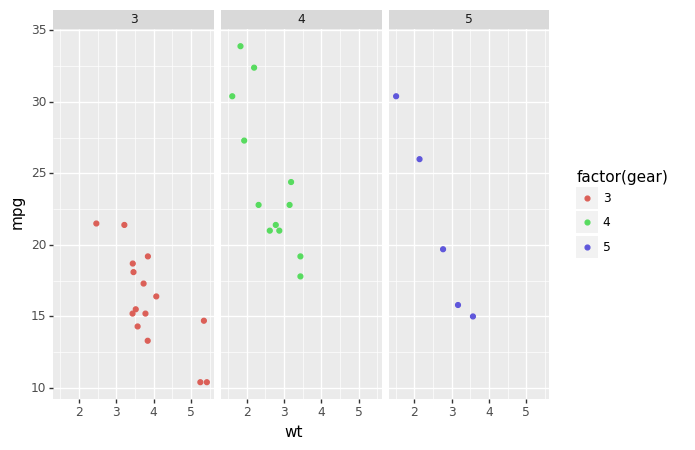

<ggplot: (395148791)>

In [8]:
# First Plot

plot = (ggplot(data=mtcars)
        + geom_point(aes("wt", "mpg", color="factor(gear)"))
        + facet_wrap("~gear"))
plot